# Estimador de densidad ventana de Parzen

Una primera aproximación no paramétrica a la estimación de densidades podría ser una mixtura de coeficientes uniformes y componentes Gaussianas hiperesféricas de idéntico tamaño:
$$p(\boldsymbol{x}\mid\boldsymbol{\theta})%
=\frac{1}{K}\sum_{k=1}^K\mathcal{N}(\boldsymbol{x}\mid\boldsymbol{\mu},\sigma^2\mathbf{I})$$
Ahora bien, la estimación del número de componentes y sus medias puede resultar problemática. Alternativamente, podemos emplear tantas componentes como datos, de manera que cada dato sea la media de su propia componente:
$$p(\boldsymbol{x}\mid\mathcal{D})%
=\frac{1}{N}\sum_{n=1}^N\mathcal{N}(\boldsymbol{x}\mid\boldsymbol{x}_n,\sigma^2\mathbf{I})$$
El **Parzen window density estimator** o **kernel density estimator (KDE)** generaliza este modelo sustituyendo cada componente por un kernel densidad:
$$p(\boldsymbol{x}\mid\mathcal{D})%
=\frac{1}{N}\sum_{n=1}^N\mathcal{K}_h(\boldsymbol{x}-\boldsymbol{x}_n)$$
En comparación con una mixtura, KDE no requiere escoger el número de componentes ni estimar parámetros, salvo el ancho de banda; ahora bien, dado que requiere mantener todos los datos, su coste espacial y temporal es muy elevado.

**Ejemplo:** KDE en 1d con $6$ datos y kernel Gaussiano

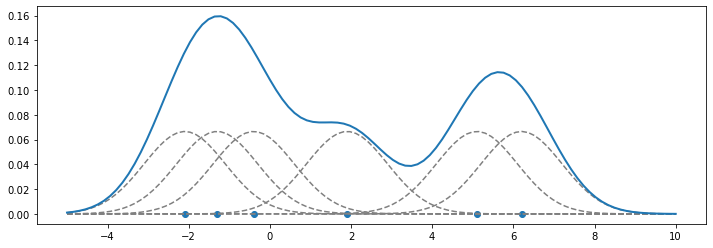

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
x_train = np.array([-2.1, -1.3, -0.4, 1.9, 5.1, 6.2])[:, np.newaxis]
N = x_train.shape[0]; h=1 # <<< bandwidth
x_test = np.linspace(-5, 10, 100)[:, np.newaxis]
plt.figure(figsize=(12, 4))
plt.scatter(x_train, np.zeros_like(x_train), marker="o")
for n in np.arange(N):
    x = x_train[n].reshape((1, 1))
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(x)
    log_dens = kde.score_samples(x_test)
    plt.plot(x_test, np.exp(log_dens) / N, c="gray", linestyle="--")
kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(x_train)
log_dens = kde.score_samples(x_test)
plt.plot(x_test, np.exp(log_dens), linewidth=2);